In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
#Keep only some columns
df2 = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

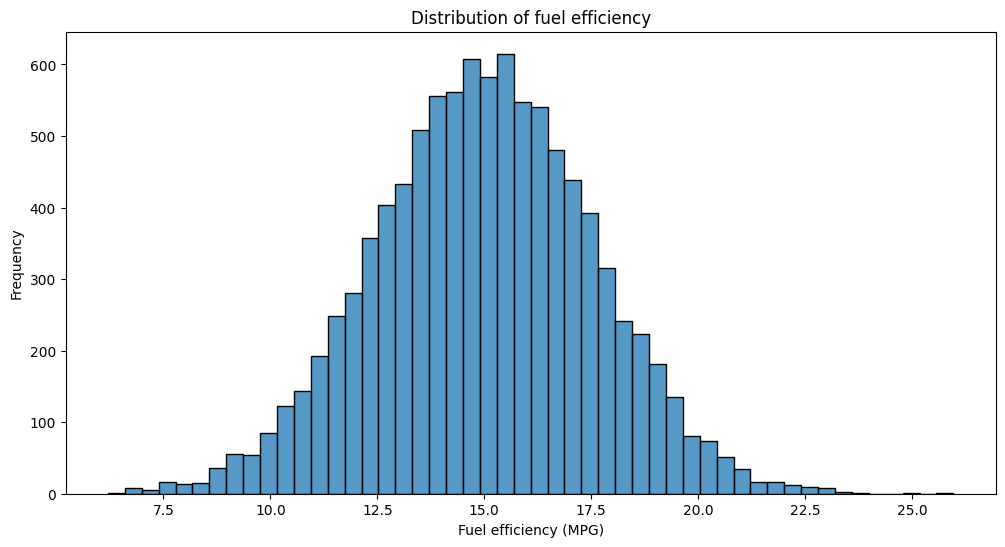

In [5]:
#Exploratory data analysis
plt.figure(figsize=(12, 6))

sns.histplot(df2.fuel_efficiency_mpg, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Fuel efficiency (MPG)')
plt.title('Distribution of fuel efficiency')

plt.show()

In [6]:
#Q1: There's one column with missing values. What is it?
col_missing_values = df2.isnull().any()
col_missing_values

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

In [7]:
#Q2: What's the median (50% percentile) for variable 'horsepower'?
median_hp = df['horsepower'].median()
print("Median horsepower:", f"{median_hp}")

Median horsepower: 149.0


In [8]:
#Prepare data split

n = len(df2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [9]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [10]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [11]:
len(df_train) +len(df_val) + len(df_test), len(df2)

(9704, 9704)

In [12]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

In [13]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [14]:
#Question 3: Deal with the missing values

#Calculate mean horsepower for training dataframe
horspower_traning_mean = df_train['horsepower'].mean()
horspower_traning_mean

np.float64(149.54476367006487)

In [15]:
#Linear regression

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [16]:
#base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [17]:
#For replacing NaN with 0
def prepare_X(df, fill_value):
    df_num = df.fillna(fill_value)
    X = df_num.values
    return X

#RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [18]:
#Missing values - 0
X_train_0 = prepare_X(df_train, 0)
w0_zero, w_zero = train_linear_regression(X_train_0, y_train)

X_val_0 = prepare_X(df_val, 0)
y_pred_0 = w0_zero + X_val_0.dot(w_zero)

rmse_0 = round(rmse(y_val, y_pred_0),2)
print(f"RMSE when filling with zero: {rmse_0}")

RMSE when filling with zero: 0.52


In [19]:
#Missing values - Mean
X_train_mean = prepare_X(df_train, horspower_traning_mean)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X(df_val, horspower_traning_mean)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

rmse_mean = round(rmse(y_val, y_pred_mean),2)
print(f"RMSE when filling with zero: {rmse_mean}")

RMSE when filling with zero: 0.46


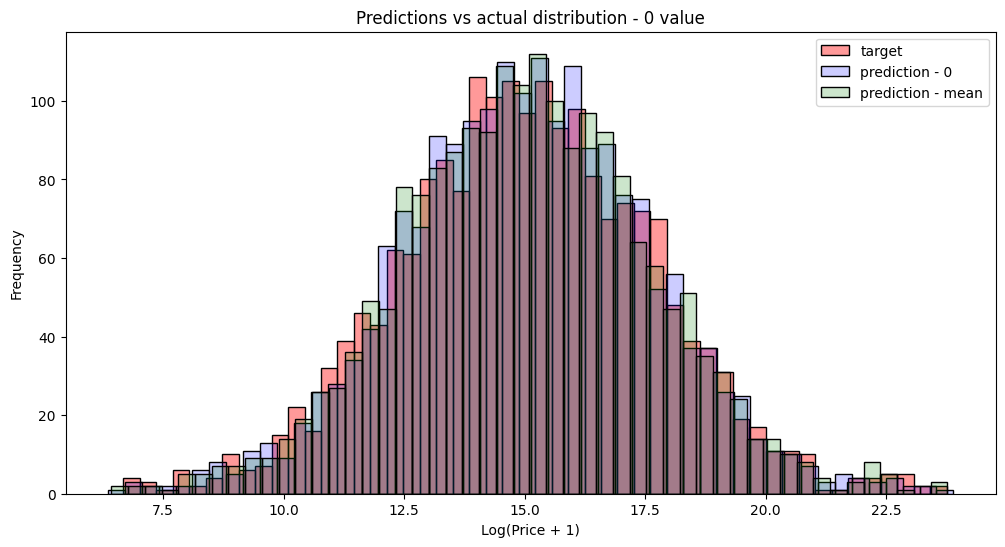

In [20]:
plt.figure(figsize=(12, 6))

sns.histplot(y_val, label='target', color='red', alpha=0.4, bins=50)
sns.histplot(y_pred_0, label='prediction - 0', color='blue', alpha=0.2, bins=50)
sns.histplot(y_pred_mean, label='prediction - mean', color='green', alpha=0.2, bins=50)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution - 0 value')

plt.show()

In [21]:
print(f"RMSE when filling with zero: {rmse_0}")
print(f"RMSE when filling with zero: {rmse_mean}")

RMSE when filling with zero: 0.52
RMSE when filling with zero: 0.46


In [22]:
#Q4: Regularized linear regression

#Linear regression

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [23]:
rs = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in rs:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    
    rmse_v = round(rmse(y_val, y_pred),2)
    print(f"For r value = {r}, RMSE is: {rmse_v}")

For r value = 0, RMSE is: 0.52
For r value = 0.01, RMSE is: 0.52
For r value = 0.1, RMSE is: 0.52
For r value = 1, RMSE is: 0.52
For r value = 5, RMSE is: 0.52
For r value = 10, RMSE is: 0.52
For r value = 100, RMSE is: 0.52


In [24]:
#Q5: different seed values

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seed_values: 
    #Prepare data split

    n = len(df2)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_shuffled = df2.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)

    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    
    rmse_v = round(rmse(y_val, y_pred),3)
    rmse_scores.append(rmse_v)
    
    print(f"RMSE is: {rmse_v}")

RMSE is: 0.521
RMSE is: 0.521
RMSE is: 0.523
RMSE is: 0.516
RMSE is: 0.511
RMSE is: 0.528
RMSE is: 0.531
RMSE is: 0.509
RMSE is: 0.515
RMSE is: 0.513


In [25]:
#Srandard deviation
st_dev = round(np.std(rmse_scores), 5)
print(f"Mean Standard Deviation is: {st_dev}")

Mean Standard Deviation is: 0.00688


In [26]:
#Q6

#Prepare data split

np.random.seed(9)

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df2.iloc[idx[:n_train]].copy()
df_val = df2.iloc[idx[n_train : n_train + n_val]].copy()
df_test = df2.iloc[idx[n_train + n_val :]].copy()

df_comb = pd.concat([df_train, df_val]).reset_index(drop=True)

y_train = df_comb.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_comb['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_comb = df_comb.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [28]:
X_train = prepare_X(df_comb, 0)
X_test = prepare_X(df_test, 0)

w0, w = train_linear_regression_reg(X_train, y_train, 0.001)

y_pred = w0 + X_test.dot(w)

rmse_v = round(rmse(y_test, y_pred), 4)

In [29]:
rmse_v

np.float64(0.5156)